In [ ]:
! [ ! -z "$COLAB_GPU" ] && pip install torch scikit-learn==0.20.* skorch

     |████████████████████████████████| 5.4MB 2.6MB/s 
     |████████████████████████████████| 122kB 45.2MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pickle
import gzip
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import h5py
import sklearn
import sklearn.datasets
import scipy

from PIL import Image
from scipy import ndimage


from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import regularizers

Using TensorFlow backend.


In [ ]:
mnist = fetch_openml('mnist_784', cache=False)

In [ ]:
mnist.data.shape

(70000, 784)

In [ ]:
mnist.data[:10]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
X = mnist.data.astype('float32')
y = mnist.target.astype('int64')

In [ ]:
X /= 255.0

In [ ]:
X.min(), X.max()

(0.0, 1.0)

In [ ]:
def plot_example(X, y,j=5):
    """Plot the first 5 images and their labels in a row."""
    for i, (img, y) in enumerate(zip(X.reshape(j, 28, 28), y)):
        plt.subplot(151 + i)
        plt.imshow(img)
        plt.xticks([])
        plt.yticks([])
        plt.title(y)

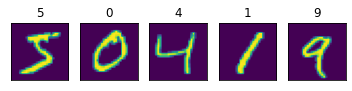

In [ ]:
plot_example(X[:5],y[:5])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
model=Sequential()
model.add(Dense(128,input_dim=784,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='softmax'))

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=10, batch_size=100)

Epoch 1/10
52500/52500 [==============================] - 3s 59us/step - loss: 1.5120 - accuracy: 0.6567
Epoch 2/10
52500/52500 [==============================] - 2s 41us/step - loss: 0.4977 - accuracy: 0.8686
Epoch 3/10
52500/52500 [==============================] - 2s 40us/step - loss: 0.3874 - accuracy: 0.8912
Epoch 4/10
52500/52500 [==============================] - 2s 40us/step - loss: 0.3420 - accuracy: 0.9025
Epoch 5/10
52500/52500 [==============================] - 2s 39us/step - loss: 0.3146 - accuracy: 0.9102
Epoch 6/10
52500/52500 [==============================] - 2s 39us/step - loss: 0.2945 - accuracy: 0.9154
Epoch 7/10
52500/52500 [==============================] - 2s 39us/step - loss: 0.2782 - accuracy: 0.9203
Epoch 8/10
52500/52500 [==============================] - 2s 40us/step - loss: 0.2643 - accuracy: 0.9247
Epoch 9/10
52500/52500 [==============================] - 2s 40us/step - loss: 0.2524 - accuracy: 0.9273
Epoch 10/10
52500/52500 [==============================

In [ ]:
score_train=model.evaluate(X_train,y_train)
print(score_train[1]*100)

52500/52500 [==============================] - 1s 28us/step
93.37523579597473


In [ ]:
score_test=model.evaluate(X_test,y_test)
print(score_test[1]*100)

17500/17500 [==============================] - 0s 28us/step
92.8342878818512


In [ ]:
y_pred=model.predict_classes(X_test)

In [ ]:
y_pred.shape

(17500,)

In [ ]:
# Check which items we got right / wrong
correct_indices = np.nonzero(y_pred == y_test)[0]

incorrect_indices = np.nonzero(y_pred != y_test)[0]

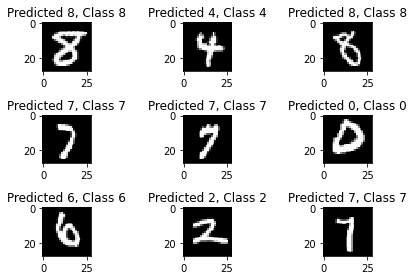

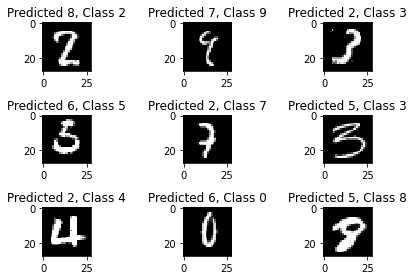

In [ ]:
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(y_pred[correct], y_test[correct]))
    
plt.tight_layout()
    
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(y_pred[incorrect], y_test[incorrect]))
    
plt.tight_layout()

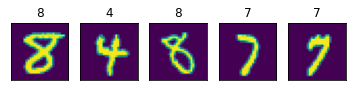

In [ ]:
plot_example(X_test[:5],y_pred[:5])